# ref

- [파이썬 데이터 분석](http://www.yes24.com/Product/Goods/108023856)

# 경사하강법

$\widehat y = ax + b$

## 1. 패키지 설정

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## 2. 데이터 준비

In [2]:
X_train = np.array([10,22,30,38,50])
y_train = np.array([41,45,62,75,85])

## 3. 탐색적 데이터 분석

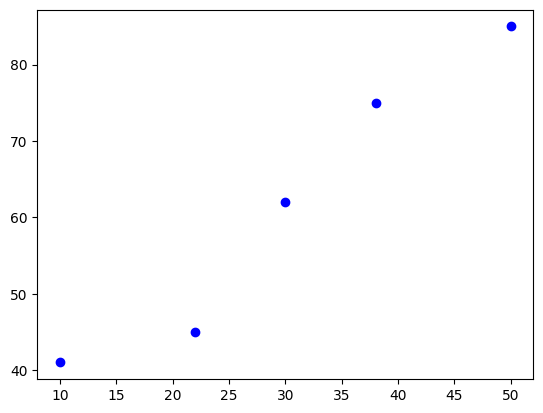

In [3]:
plt.scatter(X_train, y_train, color='b')
plt.show()

In [4]:
np.corrcoef(X_train, y_train)

array([[1.        , 0.97319891],
       [0.97319891, 1.        ]])

## 4. 피처 스케일링

In [6]:
X_train = X_train.reshape(-1,1)   # NX1 매트릭스
print(X_train)
y_train= y_train.reshape(-1,1)
print(y_train)


[[10]
 [22]
 [30]
 [38]
 [50]]
[[41]
 [45]
 [62]
 [75]
 [85]]


`-` 정규화

In [9]:
scalerX=StandardScaler()
scalerX.fit(X_train)
X_train=scalerX.transform(X_train)
print(X_train)

[[-1.46805055e+00]
 [-5.87220220e-01]
 [-8.88178420e-17]
 [ 5.87220220e-01]
 [ 1.46805055e+00]]


In [10]:
scalerY=StandardScaler()
scalerY.fit(y_train)
y_train=scalerY.transform(y_train)
print(y_train)

[[-1.21929784]
 [-0.98254098]
 [ 0.02367569]
 [ 0.79313549]
 [ 1.38502764]]


## 5. 모형화 및 학습

In [11]:
model=SGDRegressor(verbose=1)

In [12]:
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.04, NNZs: 1, Bias: -0.001467, T: 5, Avg. loss: 0.489615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1, Bias: -0.002592, T: 10, Avg. loss: 0.454060
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 1, Bias: -0.002601, T: 15, Avg. loss: 0.429691
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.11, NNZs: 1, Bias: -0.002910, T: 20, Avg. loss: 0.408928
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.13, NNZs: 1, Bias: -0.002887, T: 25, Avg. loss: 0.390899
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.15, NNZs: 1, Bias: -0.003017, T: 30, Avg. loss: 0.374571
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.17, NNZs: 1, Bias: -0.002987, T: 35, Avg. loss: 0.359796
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.19, NNZs: 1, Bias: -0.003047, T: 40, Avg. loss: 0.346121
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.20, NNZs: 1, Bias: -0.003015, T: 45, Avg. loss: 0.333511
Total training time: 0.00 seconds.
--

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(verbose=1)

## 6.예측

In [13]:
X_test = np.array([45]).reshape(-1,1)
X_test=scalerX.transform(X_test)
X_test

array([[45.]])

In [14]:
y_pred=model.predict(X_test)
print(y_pred)

[31.27270054]


```python
y_pred_inverse=scalerY.inverse_transform(y_pred)
print(y_pred_inverse)
```

# 당뇨병 진단

## 1. 패키지 설정

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2.데이터 준비

In [21]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [23]:
print(np.shape(diabetes_X))
print(np.shape(diabetes_y))

(442, 10)
(442,)


In [24]:
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [25]:
print(diabetes_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

`-` 10열(s6-혈당수치) 할당

In [26]:
X_data= diabetes_X[:,9]
print(X_data)

[-0.01764613 -0.09220405 -0.02593034 -0.00936191 -0.04664087 -0.09634616
 -0.03835666  0.00306441  0.01134862 -0.01350402 -0.03421455 -0.05906719
 -0.04249877 -0.01350402 -0.07563562 -0.04249877  0.02791705 -0.0010777
 -0.01764613 -0.05492509  0.01549073 -0.01764613 -0.01350402  0.13561183
 -0.05492509 -0.03421455 -0.0052198   0.04034337 -0.05492509  0.05276969
 -0.00936191 -0.04249877  0.02791705  0.00306441 -0.06735141  0.01963284
 -0.02593034 -0.0052198   0.02377494  0.00306441  0.09419076 -0.00936191
 -0.03421455  0.07348023 -0.01764613 -0.05078298 -0.08806194 -0.08391984
 -0.02178823 -0.01350402  0.00720652 -0.02178823 -0.01350402  0.04862759
  0.00720652  0.00720652 -0.01764613 -0.06735141 -0.05078298  0.01963284
 -0.03421455  0.01963284 -0.02593034 -0.07149352  0.01134862  0.01549073
  0.01963284  0.00306441  0.00306441  0.01963284  0.04034337  0.06105391
 -0.01764613 -0.00936191  0.07348023  0.02791705  0.01549073 -0.0010777
 -0.08391984 -0.02593034 -0.0052198  -0.0010777  -0.0

## 3.탐색적 데이터 분석

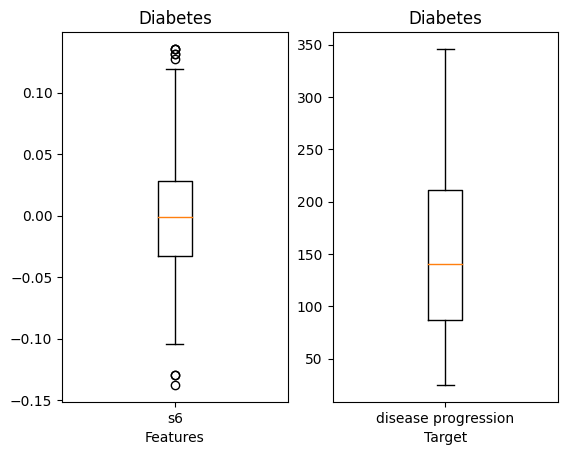

In [36]:
#입력데이터의 박스플롯
g1=plt.subplot(1,2,1)
g1.boxplot(X_data, labels=['s6'])
plt.title('Diabetes')
plt.xlabel('Features')

g2=plt.subplot(1,2,2)
g2.boxplot(diabetes_y, labels=['disease progression'])
plt.title('Diabetes')
plt.xlabel('Target')

plt.show()

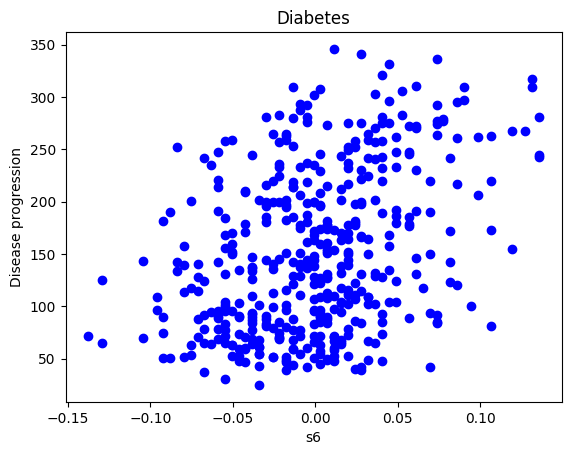

In [37]:
plt.scatter(X_data, diabetes_y, color='b')
plt.title('Diabetes')
plt.xlabel('s6')
plt.ylabel('Disease progression')
plt.show()

In [38]:
np.corrcoef(X_data,diabetes_y)

array([[1.        , 0.38248348],
       [0.38248348, 1.        ]])

## 4.데이터 분리

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_data,diabetes_y,
                                                    test_size=0.5, random_state=1234)

## 5.피처 스케일링

In [49]:
# 학습 데이터 정규화
# 2차원 행렬 변환
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

# 입력 데이터 정규화
scalerX=MinMaxScaler()
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)

# 목표 데이터 정규화
scalerY=MinMaxScaler()
scalerY.fit(y_train)
y_train_scaled = scalerY.transform(y_train)

In [60]:
# 테스트 데이터 정규화
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# 학습용 데이터의 정규화 스케일에 맞추어 입력과 목표 데이터를 정규화
X_test_scaled=scalerX.transform(X_test)
y_test_scaled=scalerY.transform(y_test)

## 6.모형화 및 학습

In [51]:
model = SGDRegressor(verbose=1)

In [52]:
model.fit(X_train_scaled, y_train_scaled)

-- Epoch 1
Norm: 0.11, NNZs: 1, Bias: 0.188126, T: 221, Avg. loss: 0.058981
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.14, NNZs: 1, Bias: 0.242482, T: 442, Avg. loss: 0.035508
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.16, NNZs: 1, Bias: 0.268429, T: 663, Avg. loss: 0.030988
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.17, NNZs: 1, Bias: 0.280449, T: 884, Avg. loss: 0.029699
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 1, Bias: 0.285992, T: 1105, Avg. loss: 0.029280
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.18, NNZs: 1, Bias: 0.290268, T: 1326, Avg. loss: 0.029095
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.19, NNZs: 1, Bias: 0.291204, T: 1547, Avg. loss: 0.028998
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.19, NNZs: 1, Bias: 0.291239, T: 1768, Avg. loss: 0.028947
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.19, NNZs: 1, Bias: 0.290878, T: 1989, Avg. loss: 0.028905
Total training time: 0.00 secon

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(verbose=1)

In [54]:
print('y절편:', model.intercept_)
print('기울기:', model.coef_)

y절편: [0.29087809]
기울기: [0.19422995]


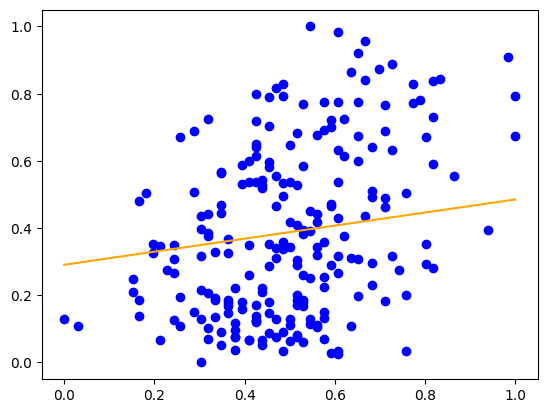

In [57]:
plt.scatter(X_train_scaled, y_train_scaled, color='b')
x=np.array([min(X_train_scaled),max(X_train_scaled)])
y=model.coef_*x+model.intercept_
plt.plot(x,y,c='orange', label='regression line')
plt.show()

## 7.예측

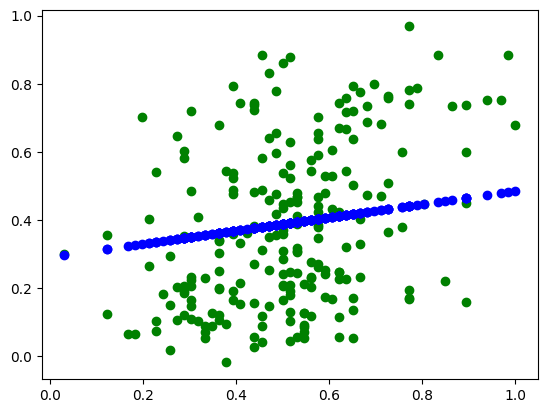

In [61]:
# 테스트 데이터 예측
y_pred=model.predict(X_test_scaled)

# 테스트 데이터 실제 값
plt.scatter(X_test_scaled, y_test_scaled, color='g')

# 테스트 데이터 예측 값
plt.scatter(X_test_scaled, y_pred, color='b')
plt.show()

In [62]:
# 예측 값의 역변환(실제 스케일)
y_pred = y_pred.reshape(-1,1)
y_pred_inverse = scalerY.inverse_transform(y_pred)